# ASSIGNMENT 4 - Classification Empirical Study: Text Classification

## Group Description

Group Number: 25

Member Name 1: Xiaoxuan Wang

Member Student Number 1: 300133594

Member Name 2: Victor Li

Member Student Number 2: 300146133

This notebook is a starting point for Assignment 4. In this assignment, you will perform a classification empirical study. This notebook will help you to create derived datasets in Section 2 of the assignment.

In [ ]:
# Let's start by installing spaCy
!pip install spacy

In [1]:
import spacy
import pandas as pd
import numpy as np

You have been given a list of datasets in the assignment description. Choose one of the datasets and provide the link below and read the dataset using pandas. You should provide a link to your own Github repository even if you are using a reduced version of a dataset from your TA's repository.

## Description of Chosen Dataset and Classification Task
We decided to use the "Airliner Passenger Reviews" dataset. The dataset is coming from [Kaggle](https://www.kaggle.com/). It can be retrieved by following [this link](https://www.kaggle.com/datasets/malharkhatu/airline-passenger-reviews).

### Objective
The objective of this study is to leverage NLP techniques to analyze and classify Airline Passenger Reviews, focusing on sentiment analysis. The primary goal is to understand the underlying sentiments expressed in customer reviews and predict whether the sentiment falls into categories of "Promoter," "Detractor," or "Passive" based on the Net Promoter Score (NPS).

### Dataset Description
The dataset includes an extensive samples of airline passenger reviews, each of which is classified into three distinct categories: Promoters, Detractors, and Passives.

In [2]:
# url = "https://raw.githubusercontent.com/uOttawa-Collabs/CSI4106-Fall-2023/master/Assignment%204/reduced_drugsComTest_raw_fiveclasses.csv"
url = "https://raw.githubusercontent.com/uOttawa-Collabs/CSI4106-Fall-2023/master/Assignment%204/reduced_file_AirPassengerReviews.csv"
# url = "https://raw.githubusercontent.com/uOttawa-Collabs/CSI4106-Fall-2023/master/Assignment%204/reduced_file_cnnnews.csv"

In [3]:
print(url)
data = pd.read_csv(url)

https://raw.githubusercontent.com/uOttawa-Collabs/CSI4106-Fall-2023/master/Assignment%204/reduced_file_AirPassengerReviews.csv


In [4]:
data.head()

,customer_review,NPS Score
0,London to Izmir via Istanbul. First time I'd ...,Passive
1,Istanbul to Bucharest. We make our check in i...,Detractor
2,Rome to Prishtina via Istanbul. I flew with t...,Detractor
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,Promoter
4,Mumbai to Dublin via Istanbul. Never book Tur...,Detractor


This is where you create the NLP pipeline. load() will download the correct model (English).

In [5]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
      --------------------------------------- 0.2/12.8 MB 2.1 MB/s eta 0:00:07
      --------------------------------------- 0.3/12.8 MB 2.2 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 2.3 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.8 MB 2.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.3/12.8 MB 2.7 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.8 MB 2.7 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Applying the pipeline to every sentences creates a Document where every word is a Token object.

Doc: https://spacy.io/api/doc

Token: https://spacy.io/api/token

In [6]:
# Apply nlp pipeline to the column that has your sentences.
data["tokenized"] = data["customer_review"].apply(nlp)

In [7]:
data.head()

,customer_review,NPS Score,tokenized
0,London to Izmir via Istanbul. First time I'd ...,Passive,"( , London, to, Izmir, via, Istanbul, ., First..."
1,Istanbul to Bucharest. We make our check in i...,Detractor,"( , Istanbul, to, Bucharest, ., We, make, our,..."
2,Rome to Prishtina via Istanbul. I flew with t...,Detractor,"( , Rome, to, Prishtina, via, Istanbul, ., I, ..."
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,Promoter,"( , Flew, on, Turkish, Airlines, IAD, -, IST, ..."
4,Mumbai to Dublin via Istanbul. Never book Tur...,Detractor,"( , Mumbai, to, Dublin, via, Istanbul, ., Neve..."


A Token object has many attributes such as part-of-speech (pos_), lemma (lemma_), etc. Take a look at the documentation to see all attributes.

The following function is an example on how you can fetch a specific pos tagging from a sentence. We return the lemmatization because we only want the infinitive word.

In [8]:
# Create empty dataframes that will store your derived datasets
derived_dataset1 = pd.DataFrame(columns=["Class", "pos"])
derived_dataset2 = pd.DataFrame(columns=["Class", "pos-np"])

In [9]:
def get_pos(sentence, wanted_pos):  # wanted_pos refers to the desired pos tagging
    words = []
    for token in sentence:
        if token.pos_ in wanted_pos:
            words.append(token.lemma_)  # lemma returns a number. lemma_ return a string
    return " ".join(words)  # return value is as a string and not a list for countVectorizer

* `derived_dataset1` contains lemmatized nouns, verbs and adjectives. We chose tokens that bear these POS for the following reason:
    * Nouns are crucial for understanding the main subjects or objects in the review, providing insights into the aspects of the airline service that passengers are commenting on.
    * Verbs can reveal the actions or events described by passengers, helping to discern the nature of their experiences and sentiments.
    * Adjectives contribute to understanding the sentiment and subjective qualities of the review, offering insights into the passengers' feelings and evaluations, which is, actually, the most important POS in terms of the classification task.
* `derived_dataset2` is almost the same as `derived_dataset1`, but with nouns removed, as `derived_dataset2` already contains recognized named entities, which are all nouns.

In [10]:
derived_dataset1["Class"] = data["NPS Score"]
derived_dataset1["pos"] = data["tokenized"].apply(lambda s: get_pos(s, ["NOUN", "VERB", "ADJ"]))

In [11]:
derived_dataset1.head()

,Class,pos
0,Passive,first time fly find good air cabin crew plane ...
1,Detractor,make check airport take luggage go gate gate s...
2,Detractor,fly company several time past year say get bad...
3,Promoter,return maintain quality fly flight leave time ...
4,Detractor,book turkish airline travel flight get delay h...


In [12]:
def get_ne(sentence):
    words = []
    for entity in sentence.ents:
        words.append(entity.text)
    return " ".join(words)

In [13]:
# Change this line to fetch your desired pos taggings for the second derived dataset
derived_dataset2["Class"] = data["NPS Score"]
derived_dataset2["pos-np"] = data["tokenized"].apply(lambda s: get_ne(s) + " " + get_pos(s, ["VERB", "ADJ"]))

In [14]:
derived_dataset2.head()

,Class,pos-np
0,Passive,London Izmir Istanbul First LHR Istanbul Engli...
1,Detractor,Istanbul two two 5 the morning 2 hours first m...
2,Detractor,Rome Prishtina Istanbul the past years Rome Pr...
3,Promoter,Turkish Airlines Turkish Airlines first 2007 A...
4,Detractor,Mumbai Dublin Istanbul Turkish Dublin Mumbai M...


In [15]:
# For Derived Dataset 2, you also need to include Named Entities
# Below is just an example of obtaining such entities on a specific sentence, but you would do NER
#   on the dataset of your choice.
# You can choose the types of entities (dates, organization, people) that you want,
#   and then in your derived dataset, just make sure you include these entities separated by spaces (as shown for verbs)
#   in a previous cell.

sentence = "apple is looking at buying U.K. startup for $1 billion"
doc = nlp(sentence)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


Now that you have your derived datasets, you can move to perform your classificaton task.

## Perform Classification Task

### Encode the text as input features with associated values

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english")

data_vectorized = tfidf_vectorizer.fit_transform(data["tokenized"].apply(str))
derived_dataset1_vectorized = tfidf_vectorizer.fit_transform(derived_dataset1["pos"])
derived_dataset2_vectorized = tfidf_vectorizer.fit_transform(derived_dataset2["pos-np"])

### Define 2 models using some default parameters

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

default_logistic_regression = LogisticRegression()
default_multilayer_perceptron = MLPClassifier()

### Train/test/evaluate the 2 models with default parameters

***Initialize KFold Cross Validator***

Here we are initializing the `KFold` validator. Explanation of parameters:
* `n_splits=4` means we are using 4-fold validation.
* `shuffle=True` means data will be shuffled before spliting to batches.
* `random_state` is the random seed used for shuffling. Here we are using a fixed number to keep reproducibility.

In [18]:
from sklearn.model_selection import KFold
four_fold = KFold(n_splits=4, shuffle=True, random_state=4106)

***Training and Evaluating the Model***

****Utility Functions****

Description for core function `train_and_evaluate`:

Inputs:
* `model`: The machine learning model to be trained and evaluated.
* `validator`: A cross-validator object used for splitting the data into training and testing sets.
* `csr_matrix_training`: A scipy `csr_matrix` containing input features for training the model.
* `series_validating`: A pandas `Series` of target labels for validating the model's predictions.

The function iterates through the training and testing sets created by the `validator`.
1. For each iteration, it trains the model using the training sets.
2. Then, it makes predictions on the test data.
3. Precision and recall scores are calculated for both micro and macro averages using the `precision_score` and `recall_score` functions from scikit-learn.
4. Zero division is handled by setting `zero_division=0`.

The calculated precision and recall scores are appended to respective lists.

After iterating through all folds, the function calculates the average precision and recall scores for both micro and macro averages using the helper function average.
The function returns a tuple containing the average micro precision, average macro precision, average micro recall, and average macro recall scores.

In [19]:
from sklearn.metrics import precision_score, recall_score

def train_and_evaluate(model, validator, csr_matrix_training, series_validating):
    micro_precision_scores = []
    macro_precision_scores = []
    micro_recall_scores = []
    macro_recall_scores = []

    X = csr_matrix_training
    y = series_validating

    # Split the dataset into training set and testing set with validator
    for train_index, test_index in validator.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions ŷ
        y_hat = model.predict(X_test)

        # Calculate precision and recall for micro and macro averages
        micro_precision = precision_score(y_test, y_hat, average="micro", zero_division=0)
        macro_precision = precision_score(y_test, y_hat, average="macro", zero_division=0)
        micro_recall = recall_score(y_test, y_hat, average="micro", zero_division=0)
        macro_recall = recall_score(y_test, y_hat, average="macro", zero_division=0)

        # Append scores to lists
        if micro_precision != 0:
            micro_precision_scores.append(micro_precision)
        if macro_precision != 0:
            macro_precision_scores.append(macro_precision)
        if micro_recall != 0:
            micro_recall_scores.append(micro_recall)
        if macro_recall != 0:
            macro_recall_scores.append(macro_recall)

    # Calculate average precision and recall scores for micro and macro averages
    return (
        average(micro_precision_scores),
        average(macro_precision_scores),
        average(micro_recall_scores),
        average(macro_recall_scores)
    )


def average(numeric_list):
    return sum(numeric_list) / len(numeric_list)


def print_result(
    average_micro_precision,
    average_macro_precision,
    average_micro_recall,
    average_macro_recall
):
    print("Average Micro Precision: {:.2f}".format(average_micro_precision))
    print("Average Macro Precision: {:.2f}".format(average_macro_precision))
    print("Average Micro Recall: {:.2f}".format(average_micro_recall))
    print("Average Macro Recall: {:.2f}".format(average_macro_recall))

****Logistic Regression on Original Dataset****

In [20]:
default_lr_original_evaluation = train_and_evaluate(
    default_logistic_regression,
    four_fold, data_vectorized,
    data["NPS Score"]
)

print_result(
    *default_lr_original_evaluation
)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Average Micro Precision: 0.79
Average Macro Precision: 0.71
Average Micro Recall: 0.79
Average Macro Recall: 0.68


****Multilayer Perceptron on Original Dataset****

In [21]:
default_mlp_original_evaluation = train_and_evaluate(
    default_multilayer_perceptron,
    four_fold, data_vectorized,
    data["NPS Score"]
)

print_result(
    *default_mlp_original_evaluation
)

Average Micro Precision: 0.77
Average Macro Precision: 0.69
Average Micro Recall: 0.77
Average Macro Recall: 0.68


****Logistic Regression on Derived Dataset #1****

In [22]:
default_lr_derived_1_evaluation = train_and_evaluate(
    default_logistic_regression,
    four_fold, derived_dataset1_vectorized,
    derived_dataset1["Class"]
)

print_result(
    *default_lr_derived_1_evaluation
)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average Micro Precision: 0.79
Average Macro Precision: 0.70
Average Micro Recall: 0.79
Average Macro Recall: 0.67


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Multilayer Perceptron on Derived Dataset #1****

In [23]:
default_mlp_derived_1_evaluation = train_and_evaluate(
    default_multilayer_perceptron,
    four_fold, derived_dataset1_vectorized,
    derived_dataset1["Class"]
)

print_result(
    *default_mlp_derived_1_evaluation
)

Average Micro Precision: 0.75
Average Macro Precision: 0.66
Average Micro Recall: 0.75
Average Macro Recall: 0.66


****Logistic Regression on Derived Dataset #2****

In [24]:
default_lr_derived_2_evaluation = train_and_evaluate(
    default_logistic_regression,
    four_fold, derived_dataset2_vectorized,
    derived_dataset2["Class"]
)

print_result(
    *default_lr_derived_2_evaluation
)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Average Micro Precision: 0.78
Average Macro Precision: 0.71
Average Micro Recall: 0.78
Average Macro Recall: 0.67


****Multilayer Perceptron on Derived Dataset #2****

In [25]:
default_mlp_derived_2_evaluation = train_and_evaluate(
    default_multilayer_perceptron,
    four_fold, derived_dataset2_vectorized,
    derived_dataset2["Class"]
)

print_result(
    *default_mlp_derived_2_evaluation
)

Average Micro Precision: 0.73
Average Macro Precision: 0.65
Average Micro Recall: 0.73
Average Macro Recall: 0.65


### Train/test/evaluate the 2 models with modified parameters (#1)

The first modified parameter was the type of the solver.
We changed the solver to 'sgd' to test the performances of the model in three datasets

In [26]:
# Define a new MLP model with sgd solver
sgd_solver_multilayer_perceptron = MLPClassifier(solver='sgd')

****sgd solver Multilayer Perceptron on Original Dataset****

In [27]:
sgd_solver_mlp_original_evaluation = train_and_evaluate(
    sgd_solver_multilayer_perceptron,
    four_fold, data_vectorized,
    data["NPS Score"]
)

print_result(
    *sgd_solver_mlp_original_evaluation
)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Micro Precision: 0.75
Average Macro Precision: 0.50
Average Micro Recall: 0.75
Average Macro Recall: 0.60


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


****sgd solver Multilayer Perceptron on Derived Dataset #1****

In [28]:
sgd_solver_mlp_derived_1_evaluation = train_and_evaluate(
    sgd_solver_multilayer_perceptron,
    four_fold, derived_dataset1_vectorized,
    derived_dataset1["Class"]
)

print_result(
    *sgd_solver_mlp_derived_1_evaluation
)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Micro Precision: 0.76
Average Macro Precision: 0.50
Average Micro Recall: 0.76
Average Macro Recall: 0.61


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


****sgd solver Multilayer Perceptron on Derived Dataset #2****

In [29]:
sgd_solver_mlp_derived_2_evaluation = train_and_evaluate(
    sgd_solver_multilayer_perceptron,
    four_fold, derived_dataset2_vectorized,
    derived_dataset2["Class"]
)

print_result(
    *sgd_solver_mlp_derived_2_evaluation
)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Micro Precision: 0.76
Average Macro Precision: 0.50
Average Micro Recall: 0.76
Average Macro Recall: 0.61


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Train/test/evaluate the 2 models with modified parameters (#2)

The second modified parameter was the initial learning rate.
We increased value of the initial learning rate from 0.001 to 0.05 to observe the impact the results on different datasets.

In [30]:
# Define a new MLP model which the initial learning rate is 0.05
larger_init_learning_rate_multilayer_perceptron = MLPClassifier(learning_rate_init=0.05)

****High init learning rate Multilayer Perceptron on Original Dataset****

In [31]:
new_mlp_original_evaluation = train_and_evaluate(
    larger_init_learning_rate_multilayer_perceptron,
    four_fold, data_vectorized,
    data["NPS Score"]
)

print_result(
    *new_mlp_original_evaluation
)

Average Micro Precision: 0.77
Average Macro Precision: 0.69
Average Micro Recall: 0.77
Average Macro Recall: 0.68


****High init learning rate Multilayer Perceptron on Derived Dataset #1****

In [32]:
new_mlp_derived_1_evaluation = train_and_evaluate(
    larger_init_learning_rate_multilayer_perceptron,
    four_fold, derived_dataset1_vectorized,
    derived_dataset1["Class"]
)

print_result(
    *new_mlp_derived_1_evaluation
)

Average Micro Precision: 0.76
Average Macro Precision: 0.68
Average Micro Recall: 0.76
Average Macro Recall: 0.68


****High init learning rate Multilayer Perceptron on Derived Dataset #2****

In [33]:
new_mlp_derived_2_evaluation = train_and_evaluate(
    larger_init_learning_rate_multilayer_perceptron,
    four_fold, derived_dataset2_vectorized,
    derived_dataset2["Class"]
)

print_result(
    *new_mlp_derived_2_evaluation
)

Average Micro Precision: 0.74
Average Macro Precision: 0.67
Average Micro Recall: 0.74
Average Macro Recall: 0.66


## Analyze the obtained results

We made a comparison table of all models for each dataset. The table has been shown below and the code must be executed after running all above code.

When we modified parameters of the MLP model, we have tried all options of many parameters including hidden_layer_sizes, activation, solver, learning rate, learning rate init, and tol... However, most of them did not cause significant impact on the performance of the model. The differences of precisions and recalls were only 0.01 or 0.02.
For example, when the hidden layer sizes are 50, 100, 150, and 200, there is no difference.

In the explored parameters, we found 2 parameters which have significant impacts: the solver, and the initial learning rate. When the solver type is sgd, the macro precision and macro recall is lower than other models, where the macro precision is much lower. It's worth mentioning that when the solver type is 'lbfgs' instead of the default 'adam,' there is no significant difference in the performance of the two models. Although the note in the official documentation mentions that the default solver 'adam' works well on relatively large datasets, while 'lbfgs' can converge faster and perform better on small datasets, we did not observe this difference.

In addition, when we increased the initial learning rate from the default 0.001 to 0.05, there was some improvement in the four evaluations across the three datasets, although these improvements were not particularly obvious.

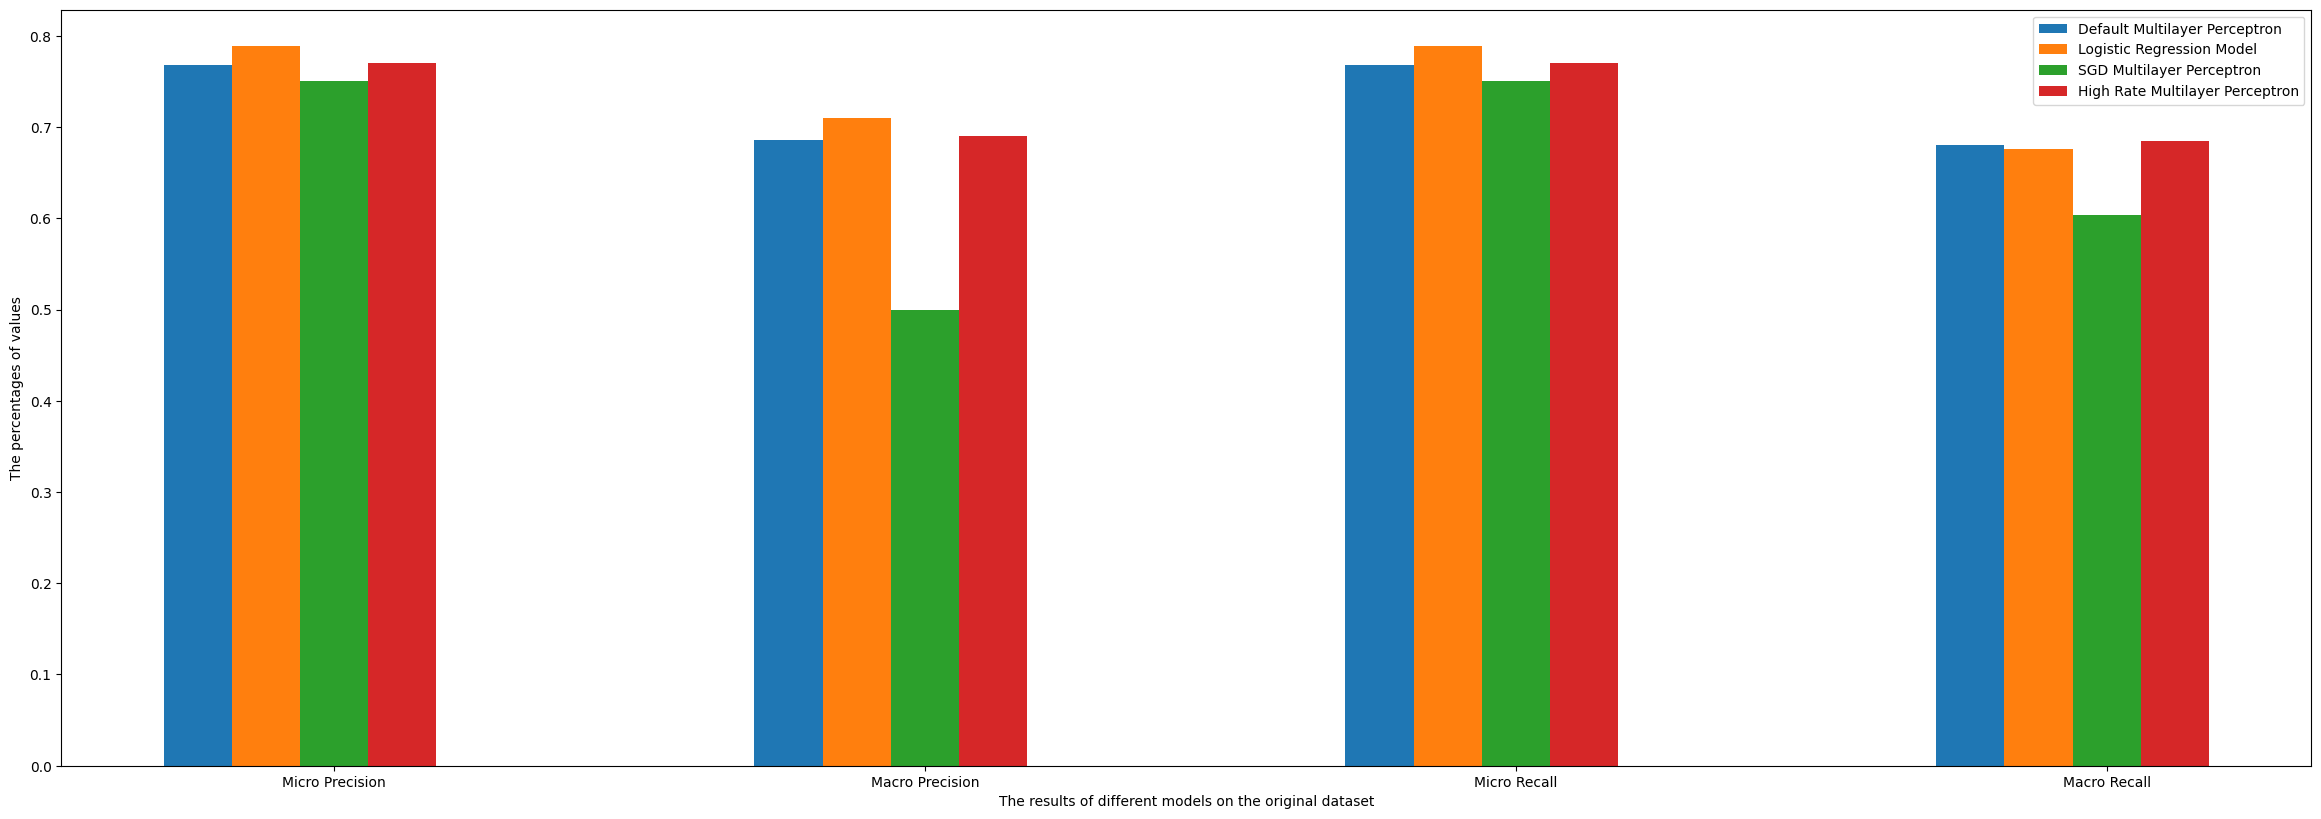

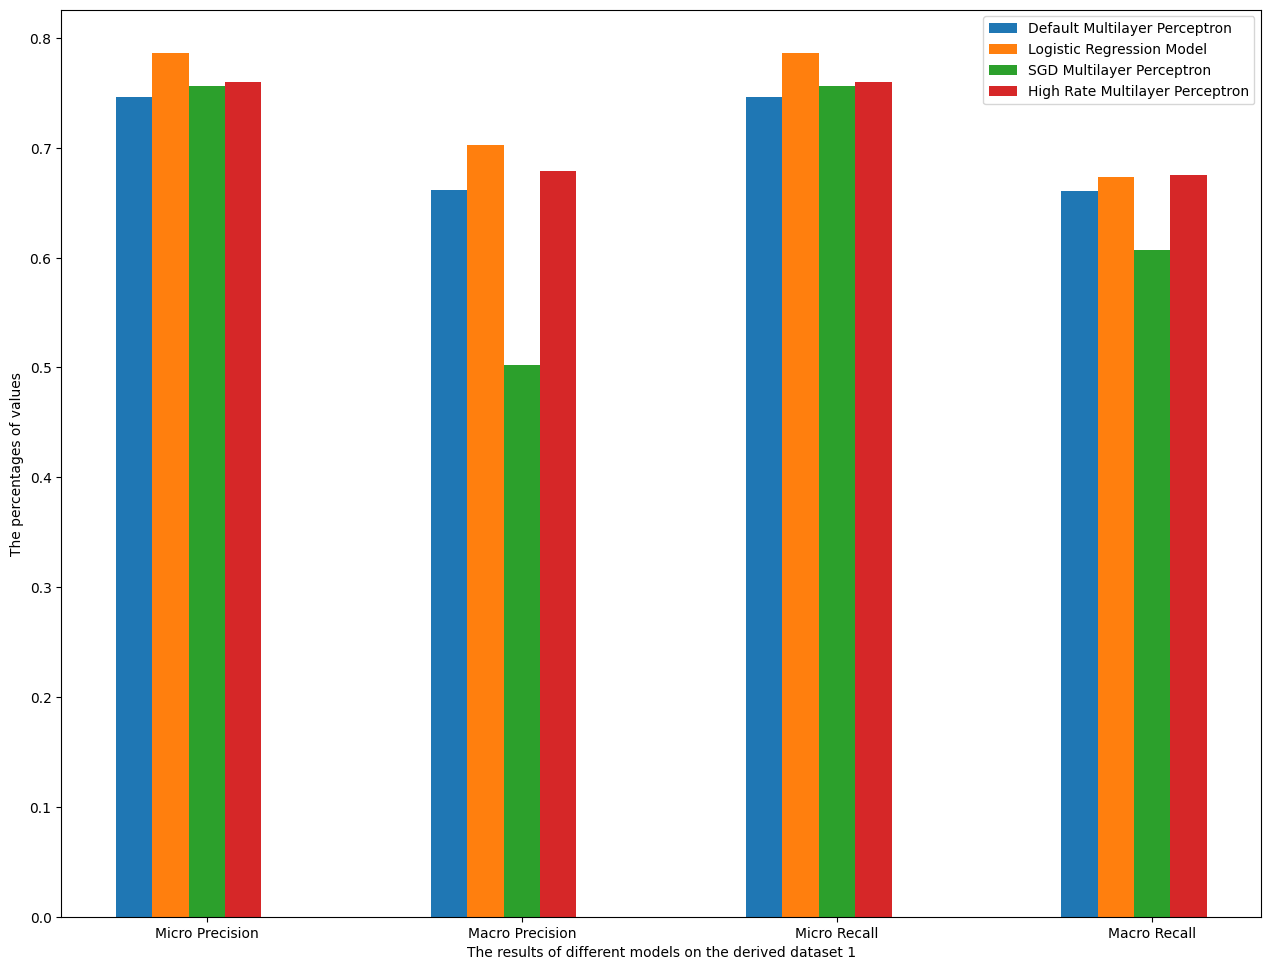

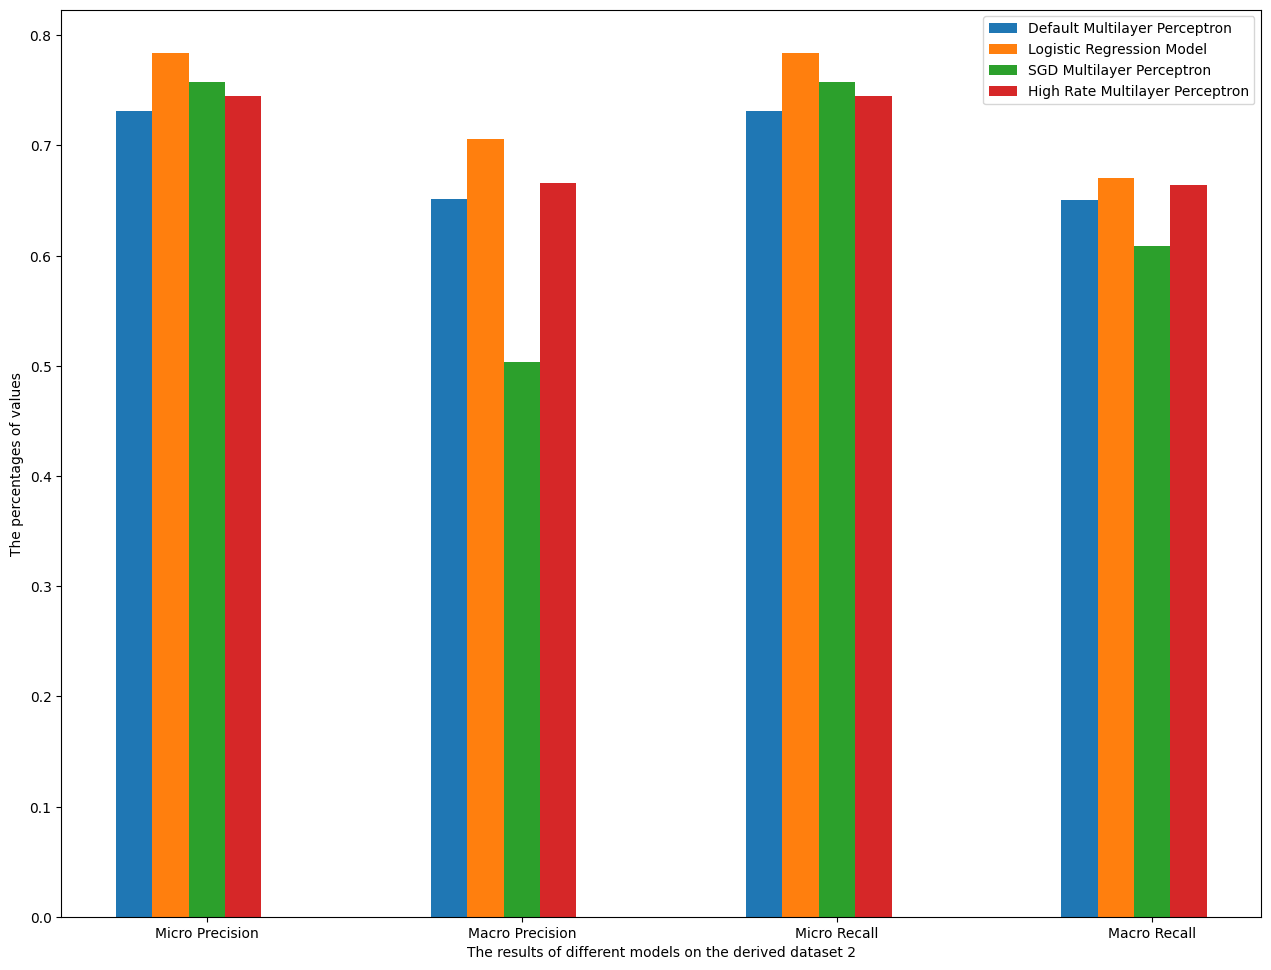

In [41]:
from matplotlib import pyplot as plot

name_list = [
    "Default Multilayer Perceptron", "Logistic Regression Model",
    "SGD Multilayer Perceptron", "High Rate Multilayer Perceptron"
]
x_label = ["Micro Precision", "Macro Precision", "Micro Recall", "Macro Recall"]

# the results of original dataset
original_result_list = []
original_result_list.append(default_mlp_original_evaluation)
original_result_list.append(default_lr_original_evaluation)
original_result_list.append(sgd_solver_mlp_original_evaluation)
original_result_list.append(new_mlp_original_evaluation)

# the results of derived dataset 1
derived_1_result_list = []
derived_1_result_list.append(default_mlp_derived_1_evaluation)
derived_1_result_list.append(default_lr_derived_1_evaluation)
derived_1_result_list.append(sgd_solver_mlp_derived_1_evaluation)
derived_1_result_list.append(new_mlp_derived_1_evaluation)

# the results of derived dataset 1
derived_2_result_list = []
derived_2_result_list.append(default_mlp_derived_2_evaluation)
derived_2_result_list.append(default_lr_derived_2_evaluation)
derived_2_result_list.append(sgd_solver_mlp_derived_2_evaluation)
derived_2_result_list.append(new_mlp_derived_2_evaluation)


width = 0.3
x_list = [0.2, 2.8, 5.4, 8]
plot.figure(figsize=(12, 4))
for i in range(len(original_result_list)):
    plot.bar(x_list, original_result_list[i], width=0.3, tick_label=x_label, label=name_list[i]) if i==2 else plot.bar(x_list, original_result_list[i], width=0.3, label=name_list[i])

    for k in range(len(x_list)):
        x_list[k] = x_list[k] + width
plot.subplots_adjust(right=2, top=2)
plot.xlabel("The results of different models on the original dataset")
plot.ylabel("The percentages of values")
plot.legend()
plot.show()

for i in range(len(derived_1_result_list)):
    plot.bar(x_list, derived_1_result_list[i], width=0.3, tick_label=x_label, label=name_list[i]) if i==2 else plot.bar(x_list, derived_1_result_list[i], width=0.3, label=name_list[i])

    for k in range(len(x_list)):
        x_list[k] = x_list[k] + width
plot.subplots_adjust(right=2, top=2)
plot.xlabel("The results of different models on the derived dataset 1")
plot.ylabel("The percentages of values")
plot.legend()
plot.show()

for i in range(len(derived_2_result_list)):
    plot.bar(x_list, derived_2_result_list[i], width=0.3, tick_label=x_label, label=name_list[i]) if i==2 else plot.bar(x_list, derived_2_result_list[i], width=0.3, label=name_list[i])

    for k in range(len(x_list)):
        x_list[k] = x_list[k] + width
plot.subplots_adjust(right=2, top=2)
plot.xlabel("The results of different models on the derived dataset 2")
plot.ylabel("The percentages of values")
plot.legend()
plot.show()


## References

[1]	F. Pedregosa et al., ‘Scikit-learn: Machine Learning in Python’, Journal of Machine Learning Research, vol. 12, pp. 2825–2830, 2011.

[2]	L. Buitinck et al., ‘API design for machine learning software: experiences from the scikit-learn project’, in ECML PKDD Workshop: Languages for Data Mining and Machine Learning, 2013, pp. 108–122.
References

[3] M. Khatu, Airline Passenger Reviews, https://www.kaggle.com/datasets/malharkhatu/airline-passenger-reviews (accessed Dec. 3, 2023).

[4] spaCy, “Library architecture · spacy API documentation,” Library Architecture, https://spacy.io/api (accessed Dec. 3, 2023).